In [1]:
import numpy as np
from ps_utils import *
import matplotlib.pyplot as plt

In [2]:
# Load the data for the Buddha dataset
I, mask, S = read_data_file("face.mat")
print(I.shape)
print(mask.shape)
print(S.shape)
# Get the size of the images and number of views
m, n, k = I.shape

albedo_matrix = np.zeros((mask.shape[0], mask.shape[1])) 
normals_matrix = np.zeros((mask.shape[0], mask.shape[1], 3)) 
albedo_matrix_15 = np.zeros((mask.shape[0], mask.shape[1])) 
normals_matrix_15 = np.zeros((mask.shape[0], mask.shape[1], 3)) 
albedo_matrix_20 = np.zeros((mask.shape[0], mask.shape[1])) 
normals_matrix_20 = np.zeros((mask.shape[0], mask.shape[1], 3)) 
albedo_matrix_30 = np.zeros((mask.shape[0], mask.shape[1])) 
normals_matrix_30 = np.zeros((mask.shape[0], mask.shape[1], 3)) 

(96, 84, 27)
(96, 84)
(27, 3)


1. Experiment with threshold.

In [3]:
# traverse every pixel
def call_ransac(row_no, col_no, albedo_matrix, normals_matrix, threshold, I, S):
    for row in range(row_no):
        for col in range(col_no):
            if mask[row, col]:
                data = (I[row, col, :], S)
                modulated_normal, inliers, best_fit = ransac_3dvector(
                    data, threshold, max_data_tries=100, max_iters=1000, p=0.9, 
                    det_threshold=1e-1, verbose=2)
                albedo_matrix[row, col] = np.linalg.norm(modulated_normal)
                normals_matrix[row, col, :] = modulated_normal / (albedo_matrix[row, col] + 0.0001)
call_ransac(m, n, albedo_matrix, normals_matrix, 10, I, S)
call_ransac(m, n, albedo_matrix_15, normals_matrix_15, 15, I, S)
call_ransac(m, n, albedo_matrix_20, normals_matrix_20, 20, I, S)
call_ransac(m, n, albedo_matrix_30, normals_matrix_30, 30, I, S)

Analysis:


2. Display and comment on the the normals and the albedo.

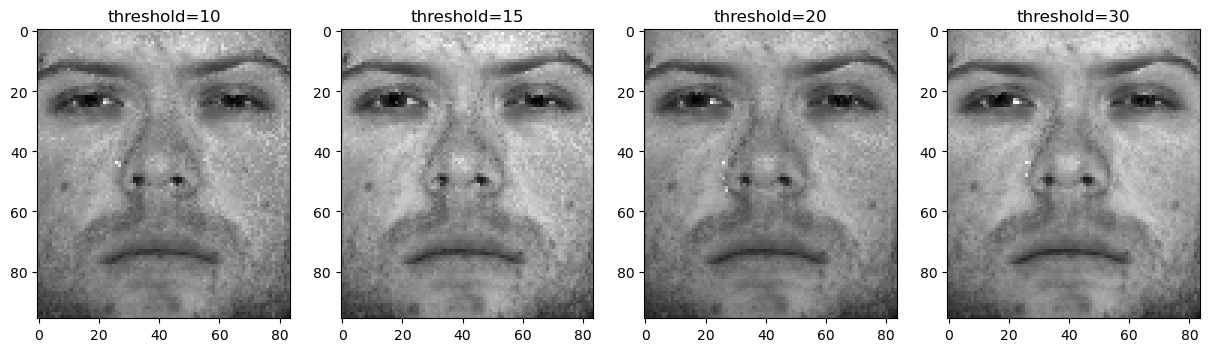

In [4]:
# plot albedo 
# Make figures larger
plt.rcParams['figure.figsize'] = (15.0, 8.0)
_,(ax1,ax2,ax3,ax4) = plt.subplots(1,4)
ax1.imshow(albedo_matrix, cmap = 'gray')
ax1.set_title('threshold=10')
ax2.imshow(albedo_matrix_15, cmap = 'gray')
ax2.set_title('threshold=15')
ax3.imshow(albedo_matrix_20, cmap = 'gray')
ax3.set_title('threshold=20')
ax4.imshow(albedo_matrix_30, cmap = 'gray')
ax4.set_title('threshold=30')
plt.show()

Analysis:
1. The image of albedo resembles the raw image, which is quite interesting!
2. The brighter parts have higher albedo values and the darker parts have smaller albedo values.
3. As the threshold goes higher, the albedo image gets smoother.

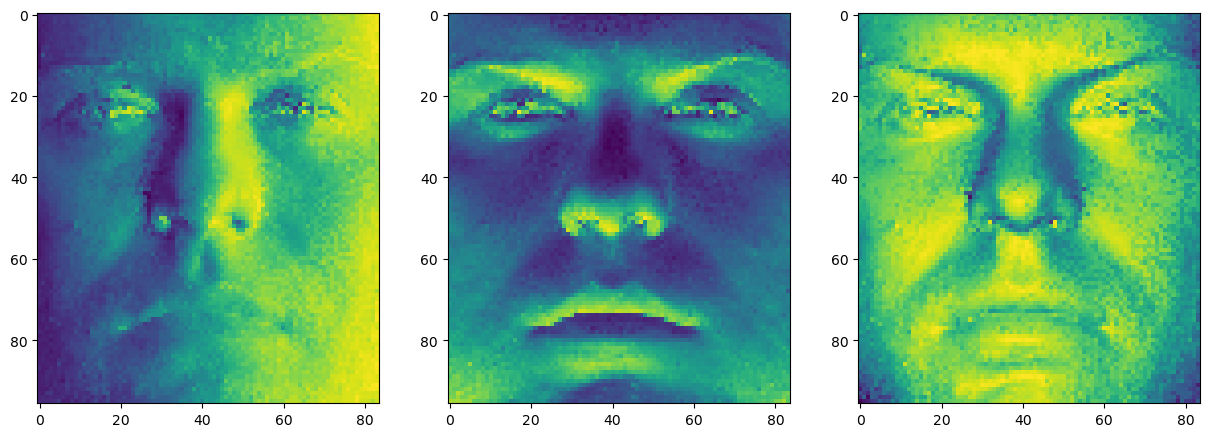

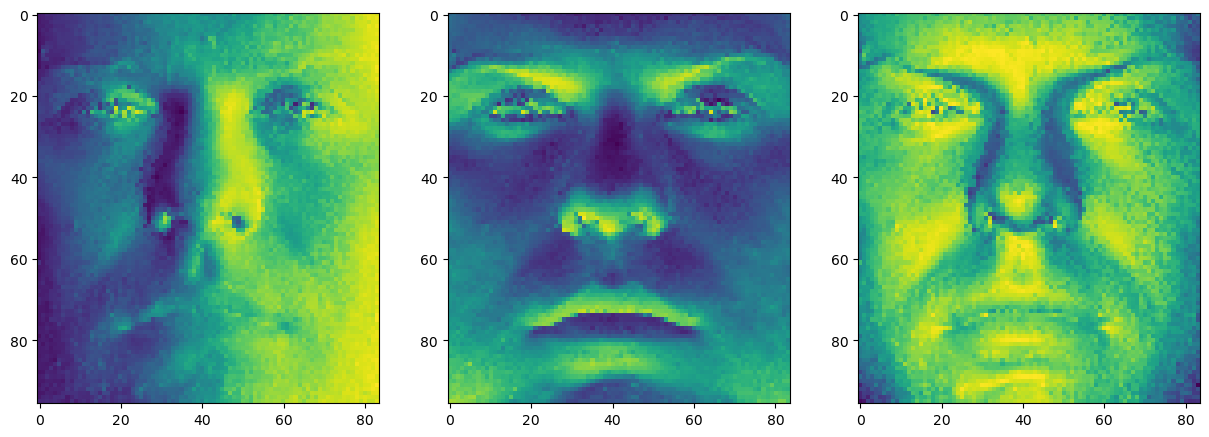

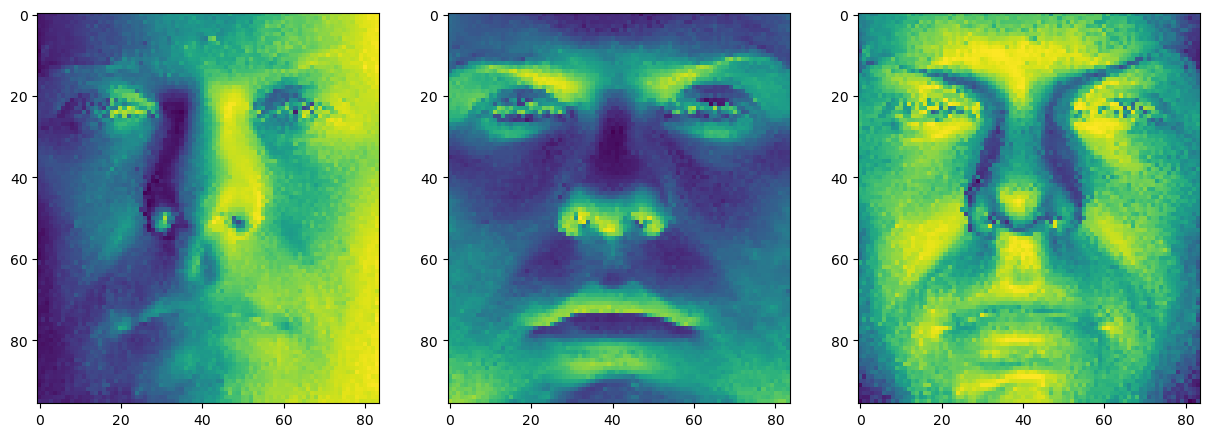

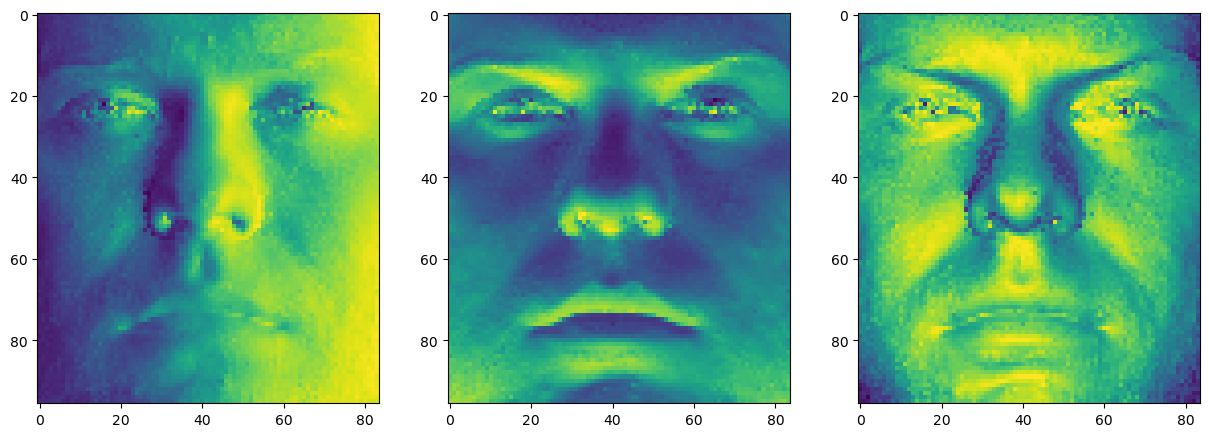

In [5]:
# plot normals 
def plot_normals(normals_matrix):
    _,(ax1,ax2,ax3) = plt.subplots(1,3)
    ax1.imshow(normals_matrix[:, :, 0])
    ax2.imshow(normals_matrix[:, :, 1])
    ax3.imshow(normals_matrix[:, :, 2])
    plt.show()
plot_normals(normals_matrix)
plot_normals(normals_matrix_15)
plot_normals(normals_matrix_20)
plot_normals(normals_matrix_30)

Analysis:
1. The images of the normals' components look like images under different light sources.
2. The normals contain information about the 3D structure of the object. 

3. Experiment with the iters parameter. 

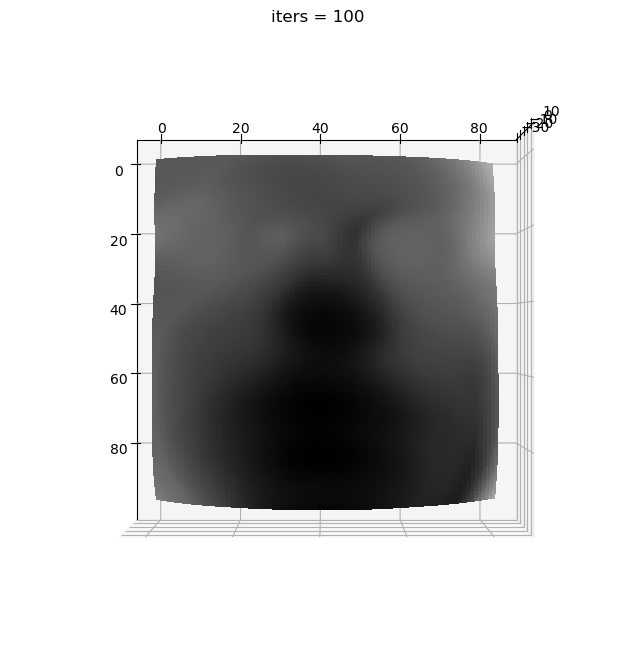

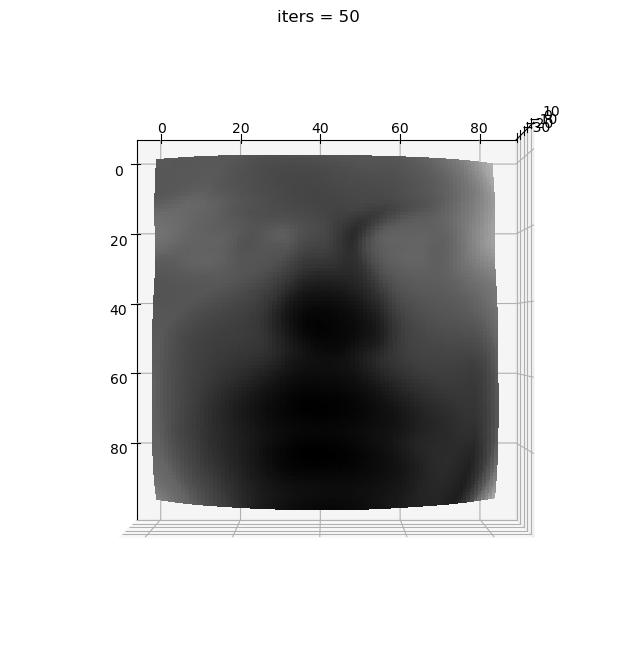

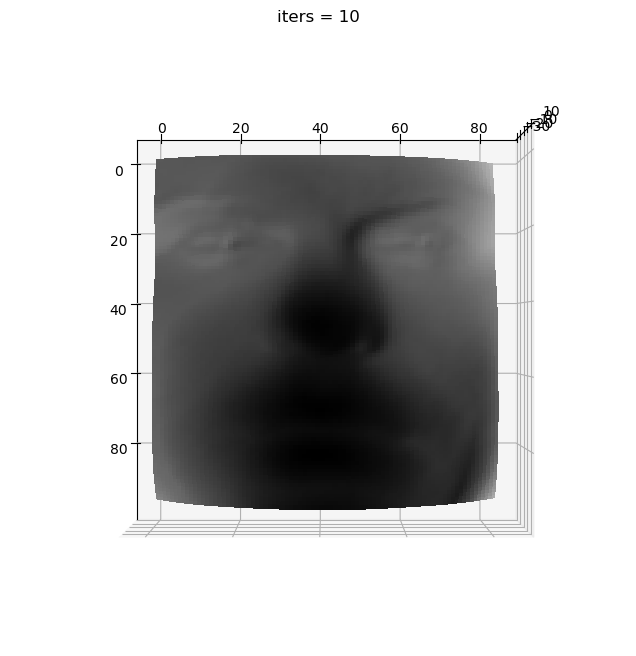

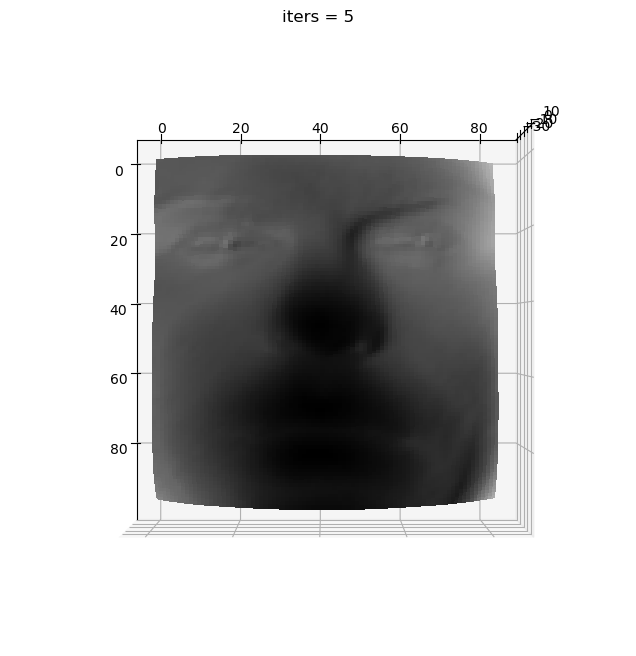

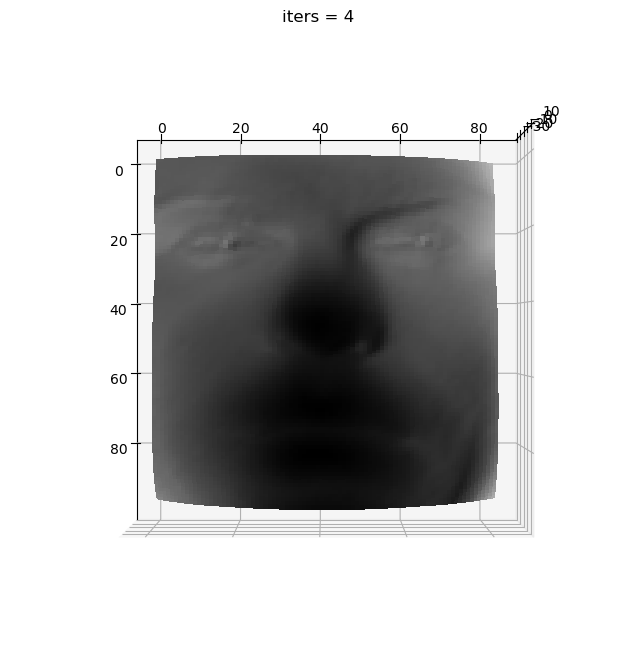

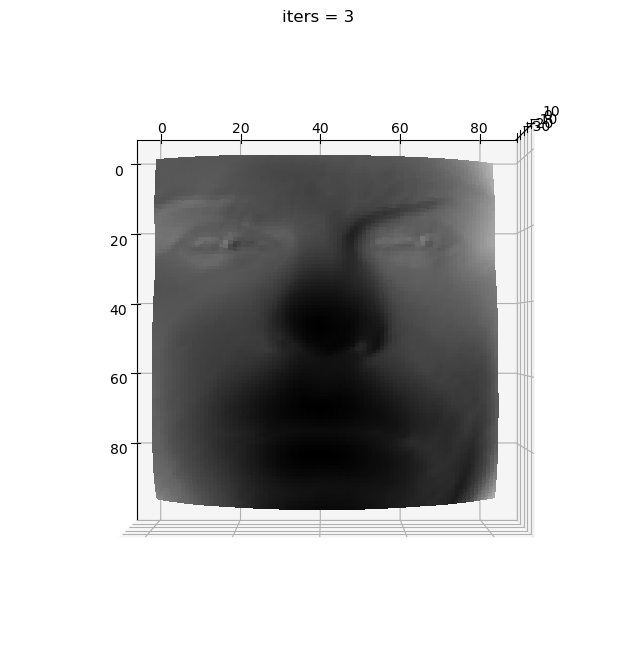

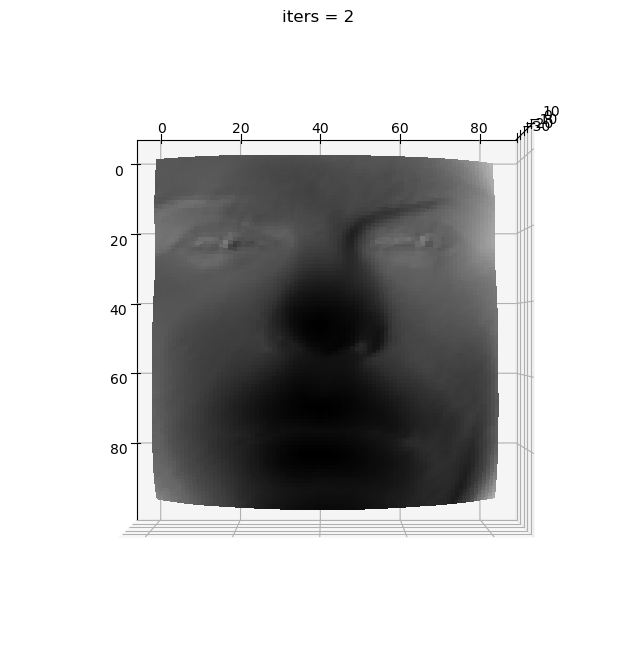

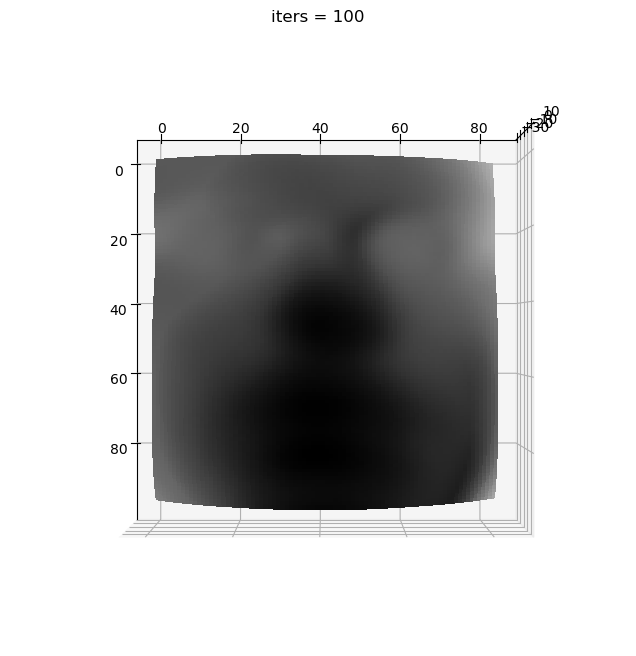

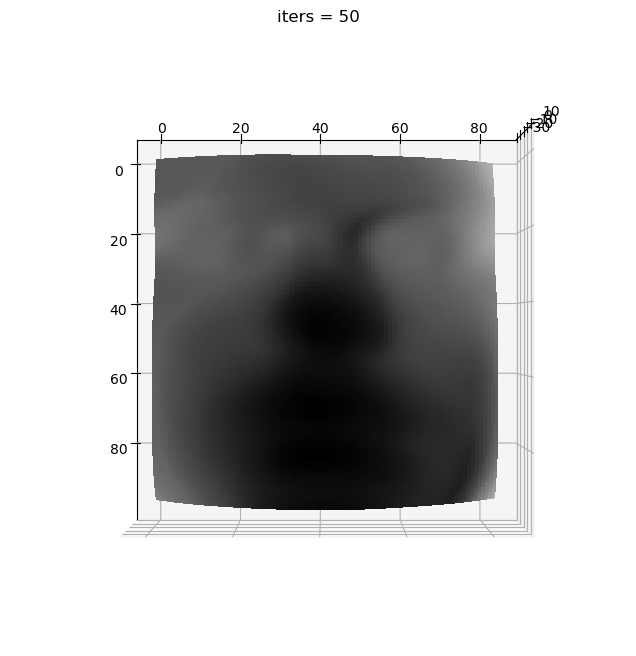

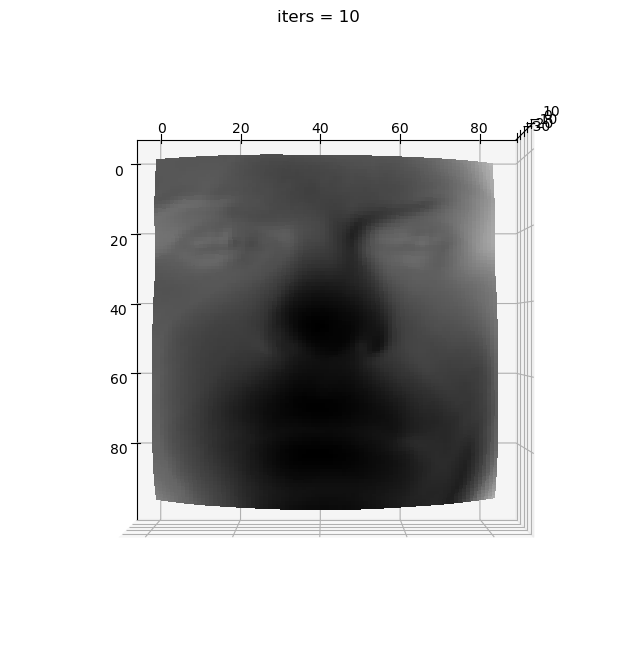

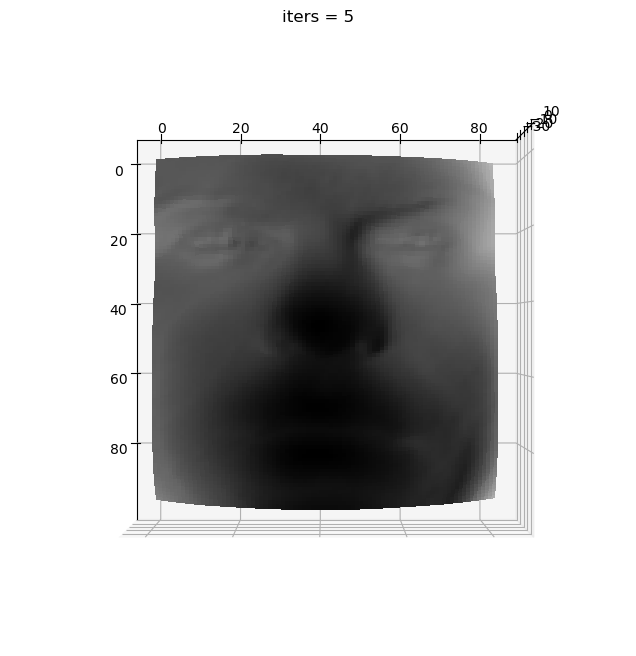

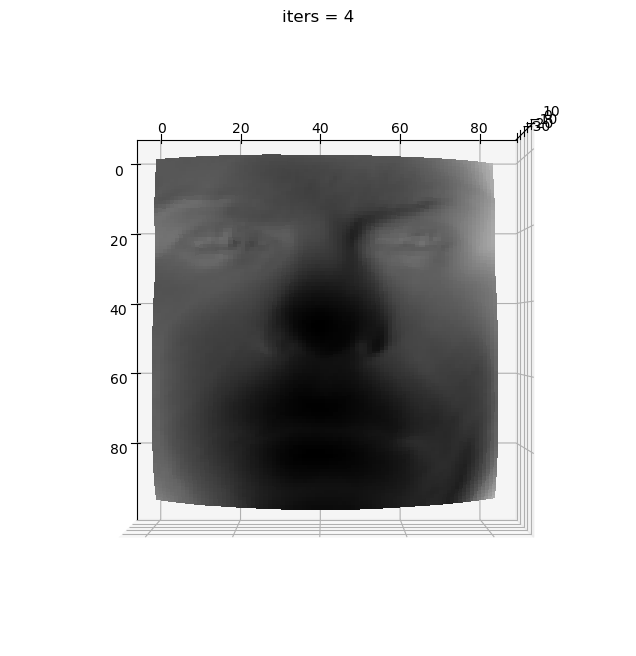

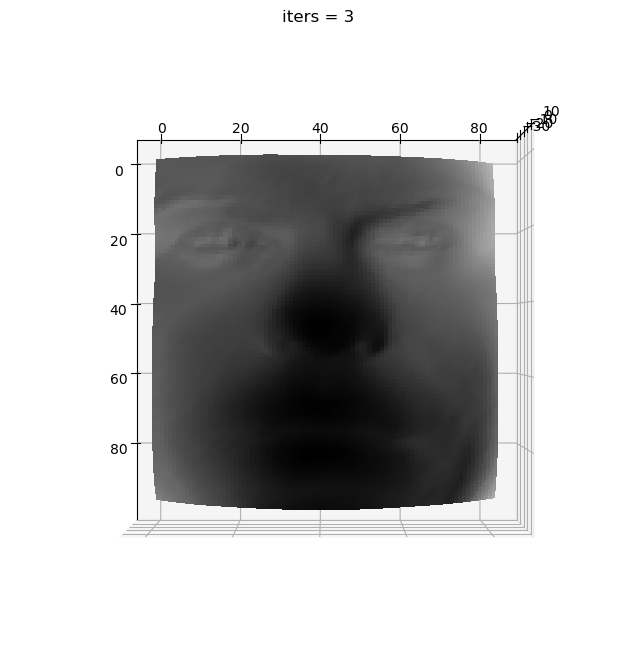

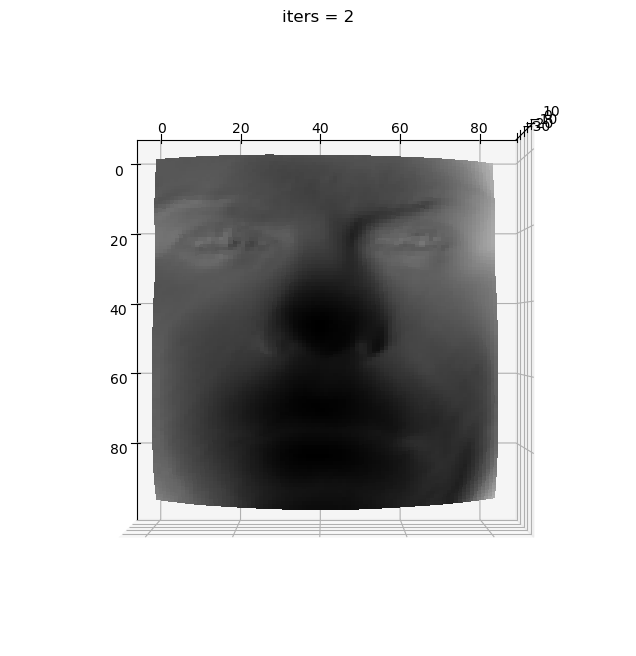

In [7]:
# smoothing
def reconstruction(normals_matrix, mask, iters, elev=90, azim=0):
    (n1, n2, n3) = smooth_normal_field(normals_matrix[:,:,0], normals_matrix[:,:,1], 
                                       normals_matrix[:,:,2], mask, iters=iters)
    z = unbiased_integrate(n1, n2, n3, mask)
    display_surface(z, title=f'iters = {iters}', elev=elev, azim=azim)

reconstruction(normals_matrix, mask, 100)
reconstruction(normals_matrix, mask, 50)
reconstruction(normals_matrix, mask, 10)
reconstruction(normals_matrix, mask, 5)
reconstruction(normals_matrix, mask, 4)
reconstruction(normals_matrix, mask, 3)
reconstruction(normals_matrix, mask, 2)

reconstruction(normals_matrix_30, mask, 100)
reconstruction(normals_matrix_30, mask, 50)
reconstruction(normals_matrix_30, mask, 10)
reconstruction(normals_matrix_30, mask, 5)
reconstruction(normals_matrix_30, mask, 4)
reconstruction(normals_matrix_30, mask, 3)
reconstruction(normals_matrix_30, mask, 2)




Analysis:
1. As the iter goes higher, the reconstructed surface becomes more smoothed and loses more details.
2. The best iter value for this case could be 10. In this case, the result is smoothed and contains enough details, e.g. eyes.

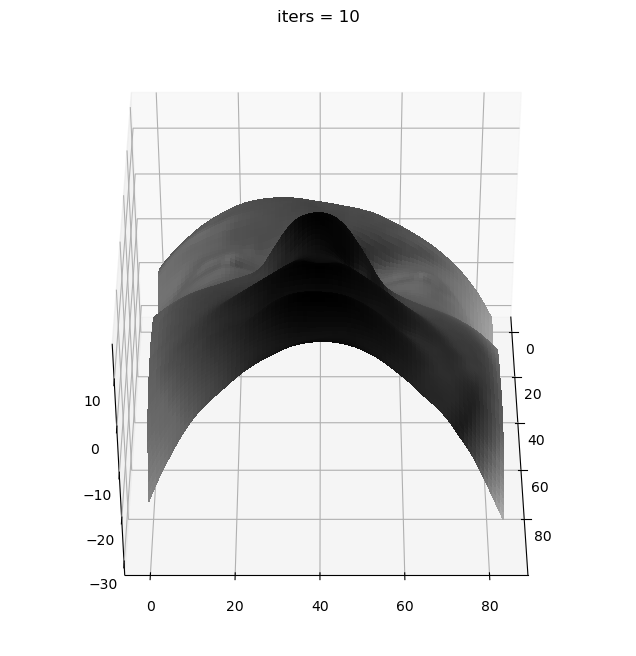

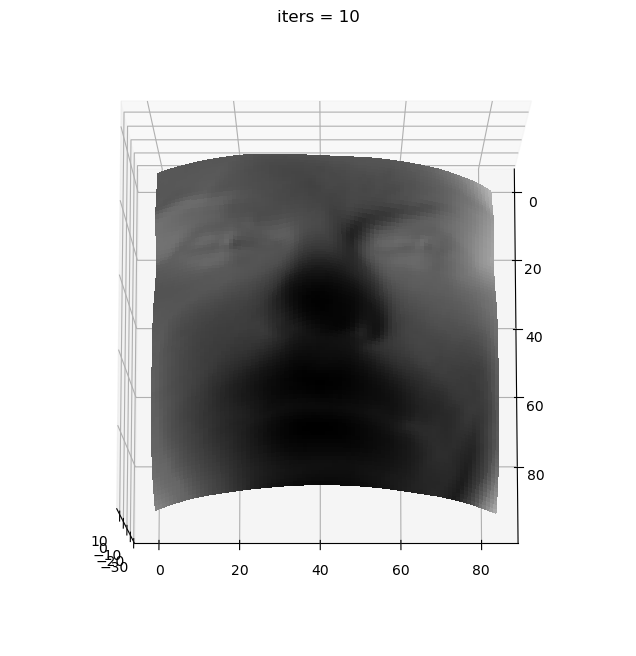

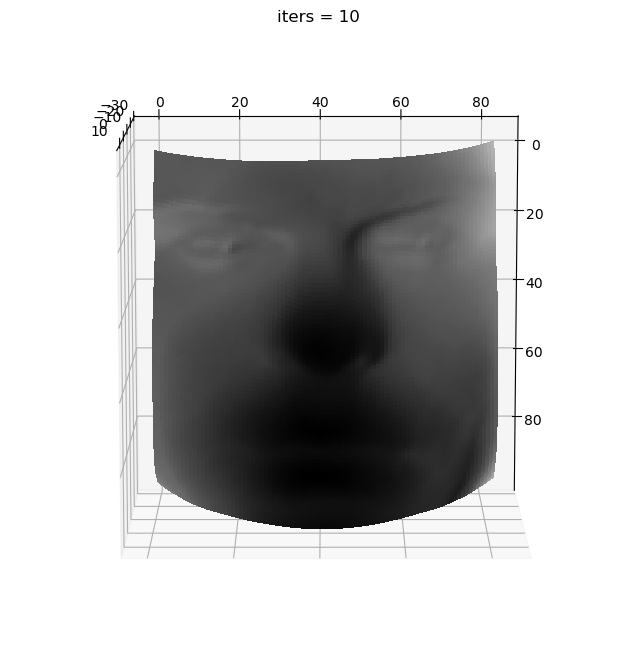

In [9]:
reconstruction(normals_matrix, mask, 10, 40, 0)
reconstruction(normals_matrix, mask, 10, 80, 0)
reconstruction(normals_matrix, mask, 10, 100, 0)

